In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Dataset Link - https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

In [3]:
df = pd.read_csv('Clean_Dataset.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# EDA

In [4]:
# The feature Unnamed: 0 is not required so dropping

df.drop(['Unnamed: 0'], axis = 1, inplace = True)

df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [15]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [5]:
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [6]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [7]:
# checking null values
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

<Axes: xlabel='price'>

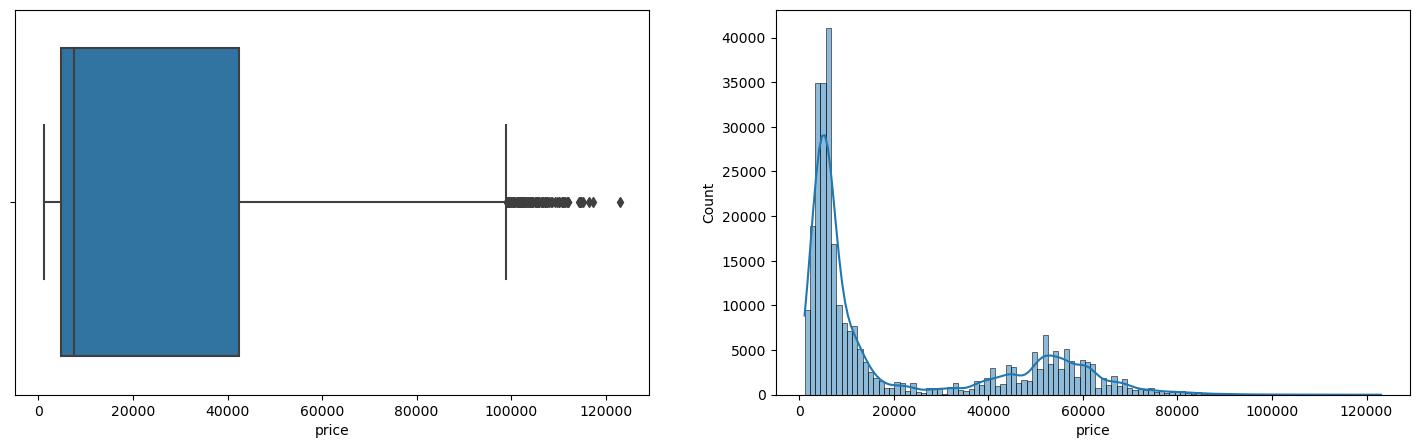

In [8]:
# checking the distribution
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = df, kde = True)
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = df)

In [9]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

In [11]:
df1['airline'] = pd.Categorical(df1['airline'])

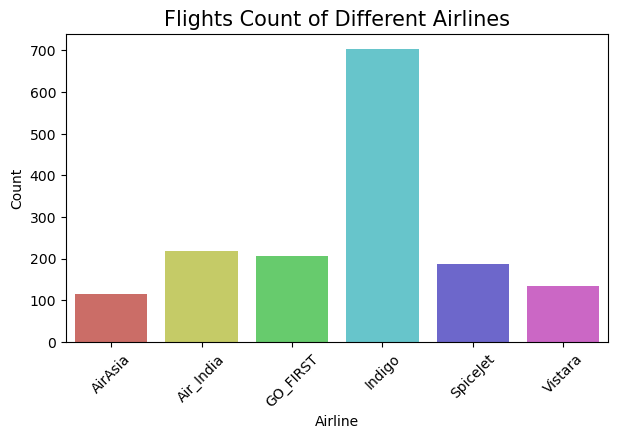

In [12]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df1, x='airline', palette='hls')
plt.title('Flights Count of Different Airlines', fontsize=15)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

- Indigo becaming as a most popular Airline



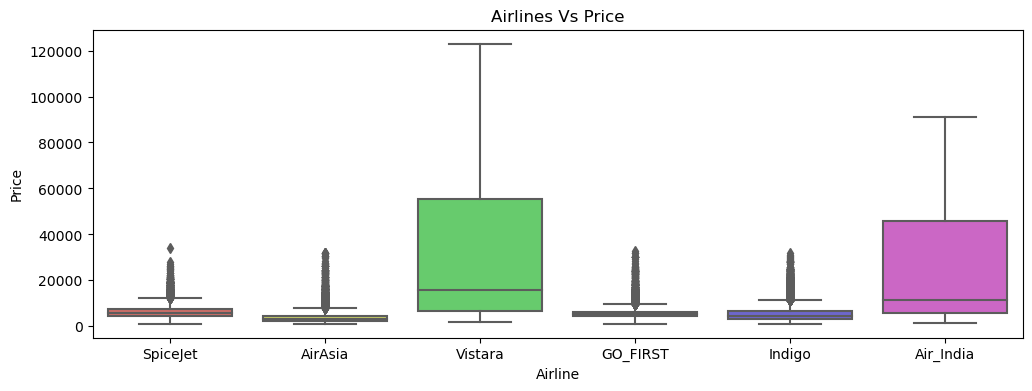

In [13]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

- As we can see Vistara has Maximum Price range
- Vistara and Air_India Airlines Have Maximum Price when compared to Others
- SpiceJet , AirAsia , GO_First and Indigo has some what equal prices

C:\Users\sivaa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


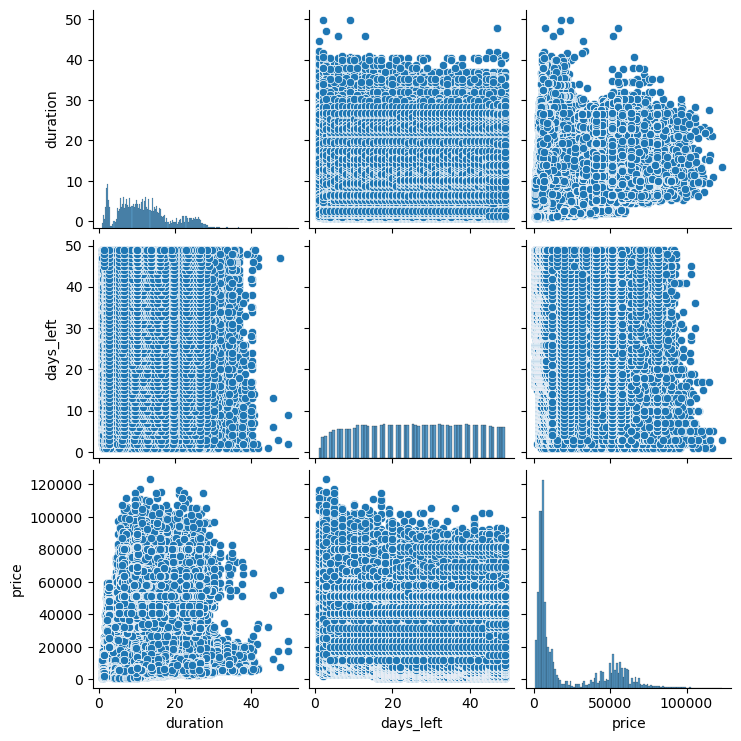

In [14]:
sns.pairplot(df)
plt.show()

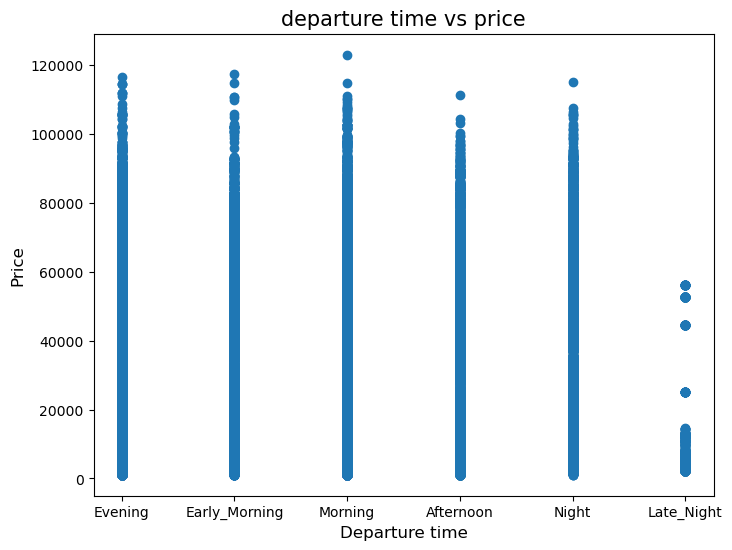

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(df['departure_time'], df['price'])
plt.title('departure time vs price', fontsize=15)
plt.xlabel('Departure time', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

# Data Preprocessing

In [8]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time','destination_city', 'class']

le = LabelEncoder()

for i in categorical_columns:
    df[i] = le.fit_transform(df[i])

df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


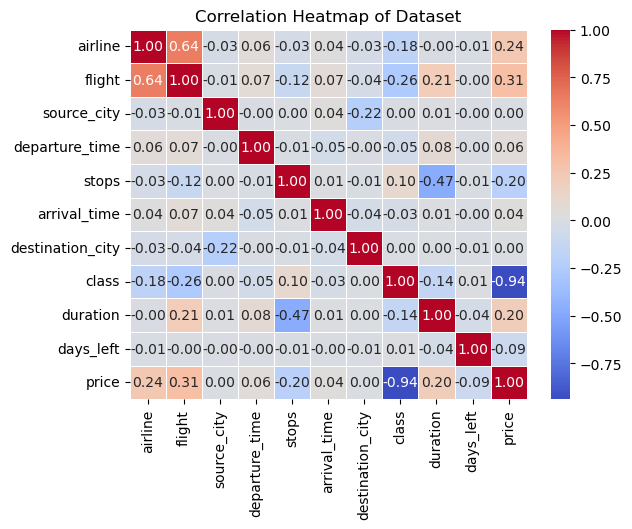

In [9]:
corr = df.corr()

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Dataset')

plt.show()

# PCA

In [10]:
from sklearn.decomposition import PCA

In [11]:
df_pca = df.drop(['price'], axis = 1)

In [12]:
df_pca

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,1408,2,2,2,5,5,1,2.17,1
1,4,1387,2,1,2,4,5,1,2.33,1
2,0,1213,2,1,2,1,5,1,2.17,1
3,5,1559,2,4,2,0,5,1,2.25,1
4,5,1549,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49
300149,5,1481,1,0,0,5,3,0,10.42,49
300150,5,1486,1,1,0,5,3,0,13.83,49
300151,5,1483,1,1,0,2,3,0,10.00,49


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
flight_df_pca = StandardScaler().fit_transform(df_pca)
flight_df_pca = pd.DataFrame(flight_df_pca, columns= df_pca.columns)
flight_df_pca.describe()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
count,3.001530e+05,3.001530e+05,3.001530e+05,3.001530e+05,3.001530e+05,3.001530e+05,3.001530e+05,3.001530e+05,3.001530e+05,3.001530e+05
mean,1.181740e-16,5.681444e-17,2.727093e-17,7.272249e-17,-2.121073e-17,5.359496e-17,-2.677854e-16,-1.151439e-16,9.999342e-17,1.166590e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.693633e+00,-2.550625e+00,-1.471431e+00,-1.377971e+00,-4.267923e-01,-1.765028e+00,-1.483659e+00,-1.486822e+00,-1.583849e+00,-1.843875e+00
25%,-1.148157e+00,-7.155867e-01,-9.005761e-01,-8.079341e-01,-4.267923e-01,-6.167010e-01,-9.104424e-01,-1.486822e+00,-7.495873e-01,-8.115011e-01
50%,-5.720579e-02,1.257655e-01,-3.297212e-01,-2.378975e-01,-4.267923e-01,5.316265e-01,2.359915e-01,6.725756e-01,-1.350143e-01,-3.503368e-04
75%,1.033746e+00,9.319636e-01,8.119884e-01,9.021758e-01,-4.267923e-01,1.105790e+00,8.092085e-01,6.725756e-01,5.490805e-01,8.845414e-01
max,1.033746e+00,1.105390e+00,1.382843e+00,1.472212e+00,2.577006e+00,1.105790e+00,1.382425e+00,6.725756e-01,5.229290e+00,1.695692e+00


In [15]:
pcamodel = PCA()
pca = pcamodel.fit_transform(flight_df_pca)
pca.shape

(300153, 10)

In [16]:
print(np.round(pcamodel.explained_variance_ratio_,3))

[0.192 0.139 0.124 0.103 0.1   0.093 0.086 0.077 0.053 0.032]


In [17]:
np.cumsum(np.round(pcamodel.explained_variance_ratio_,3))

array([0.192, 0.331, 0.455, 0.558, 0.658, 0.751, 0.837, 0.914, 0.967,
       0.999])

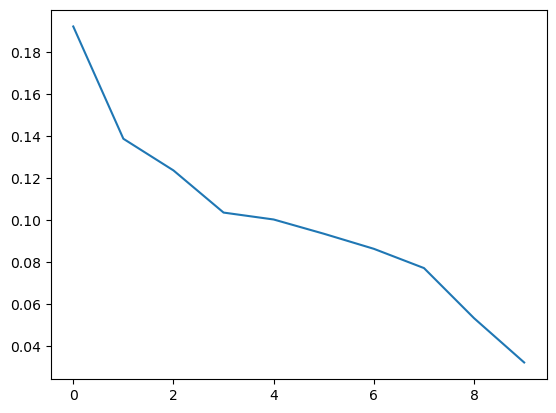

In [18]:
plt.plot(pcamodel.explained_variance_ratio_);

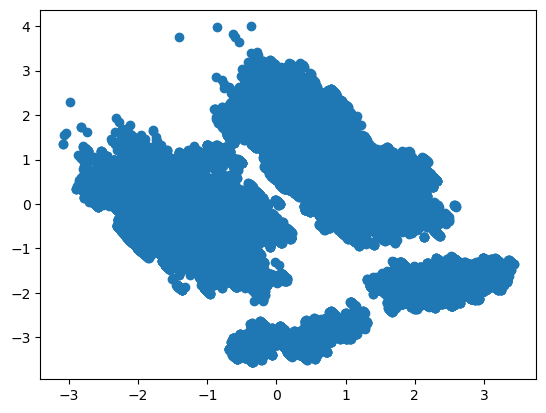

In [19]:
plt.scatter(pca[:, 0], pca[:, 1]);

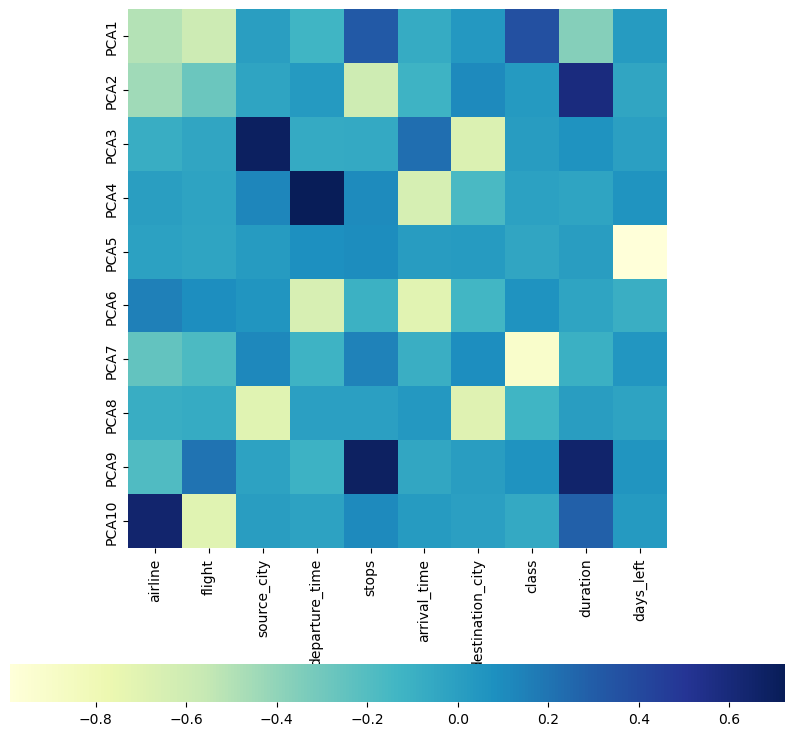

In [20]:
plt.figure(figsize=[10,10])
ax = sns.heatmap(pcamodel.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 xticklabels=list(flight_df_pca.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

# Splitting dataset

When we are considering 8 features we are getting 90% of information. So, proceeding using all 10 features

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape, y_train.shape

((240122, 10), (240122,))

In [23]:
X_test.shape, y_test.shape

((60031, 10), (60031,))

# Linear Regression

In [24]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [25]:
X2_train = sm.add_constant(X_train)
est = sm.OLS(y_train, X2_train)
est2 = est.fit()  
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 2.278e+05
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:51:41   Log-Likelihood:            -2.4670e+06
No. Observations:              240122   AIC:                         4.934e+06
Df Residuals:                  240111   BIC:                         4.934e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.044e+04     79.300  

In [26]:
linear_model_1 = LinearRegression()
linear_model_1.fit(X_train,y_train)

train_pred=linear_model_1.predict(X_train)
train_results=pd.DataFrame({'Price':y_train,
                            'predicted':train_pred,
                            'residual':y_train - train_pred})
train_results.head()

,Price,predicted,residual
148417,13524,9251.225961,4272.774039
36879,9940,5591.960032,4348.039968
274531,55983,48233.600747,7749.399253
166397,7927,11031.251740,-3104.251740
272722,55502,58750.807920,-3248.807920


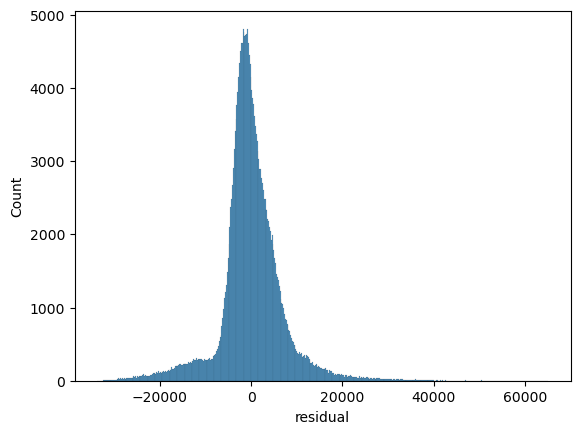

In [27]:
sns.histplot(train_results.residual);

In [28]:
train_results.residual.describe()

count    2.401220e+05
mean     5.821445e-12
std      7.008905e+03
min     -3.371124e+04
25%     -2.963749e+03
50%     -4.320378e+02
75%      3.036803e+03
max      6.513841e+04
Name: residual, dtype: float64

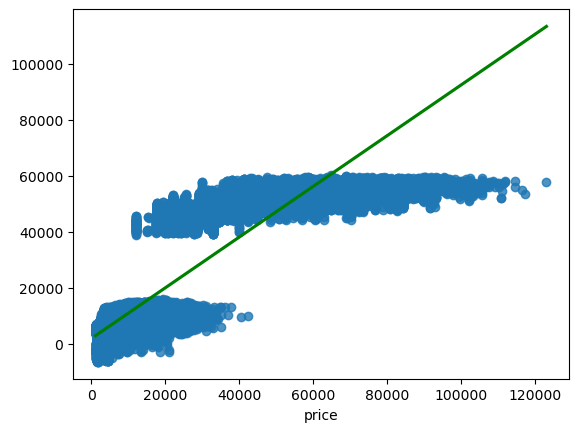

In [29]:
sns.regplot(x=y_train,y=train_pred,data=train_results, line_kws={'color': 'g'});

In [30]:
r2_score(y_train,train_pred).round(2)

0.9

In [31]:
test_pred=linear_model_1.predict(X_test)
test_results=pd.DataFrame({'Price':y_test,
                            'predicted':test_pred,
                            'residual':y_test - test_pred})
test_results.head()

,Price,predicted,residual
27131,7366,4567.013416,2798.986584
266857,64831,52844.339673,11986.660327
141228,6195,7904.949552,-1709.949552
288329,60160,56121.015486,4038.984514
97334,6578,6672.773495,-94.773495


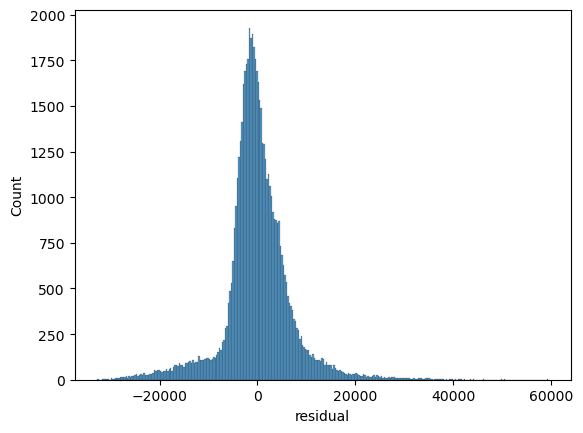

In [32]:
sns.histplot(test_results.residual);

In [33]:
test_results.residual.describe()

count    60031.000000
mean       -16.269027
std       7013.598032
min     -32735.141033
25%      -2963.293348
50%       -428.662175
75%       2991.043373
max      59424.796424
Name: residual, dtype: float64

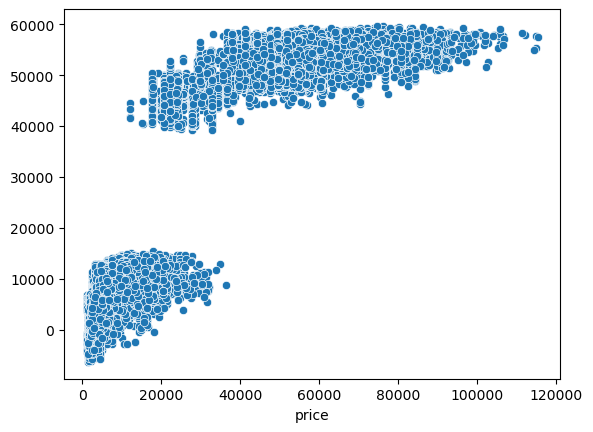

In [34]:
sns.scatterplot(x=y_test,y=test_pred,data=test_results);

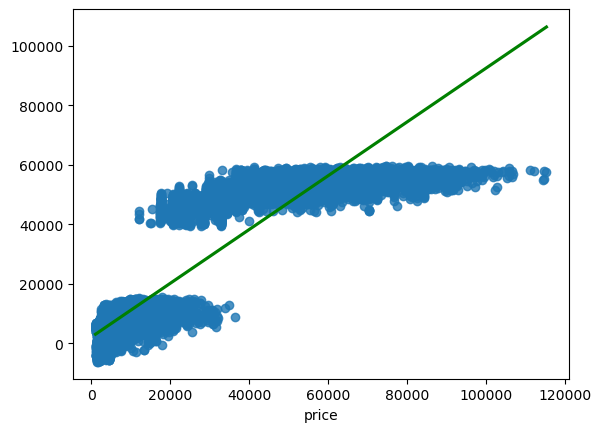

In [35]:
sns.regplot(x=y_test,y=test_pred,data=test_results, line_kws={'color': 'g'});

In [36]:
r2_score(y_test,test_pred).round(2)

0.9

In [37]:
from numpy.core.fromnumeric import mean
from math import sqrt
def ERROR_METRICS(orig,pred):
    resid= orig - pred
    resid_sq= resid**2
    me= round(mean(resid),3)
    mae=round(mean(np.abs(resid)),3)
    mape=round(100*mean(np.abs(resid/orig)),3)
    rmse=round(sqrt(mean(resid_sq)),3)
    return {'ME':me, 'MAE':mae, 'MAPE':mape, 'RMSE':rmse}

In [38]:
ERROR_METRICS(y_train,train_pred)

{'ME': 0.0, 'MAE': 4644.421, 'MAPE': 43.708, 'RMSE': 7008.891}

In [39]:
ERROR_METRICS(y_test,test_pred)

{'ME': -16.269, 'MAE': 4622.187, 'MAPE': 43.444, 'RMSE': 7013.558}

In [40]:
from sklearn.metrics import mean_absolute_percentage_error
100*mean_absolute_percentage_error(y_test, test_pred).round(3)

43.4

In [42]:
# from sklearn.metrics import roc_curve, auc
# fpr, tpr, _ = roc_curve(test_results['Price'], test_results['predicted'])
# roc_auc = auc(fpr, tpr)

# plt.figure(figsize=[5, 5])
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',
#          lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate (1 - Specificity)')
# plt.ylabel('True Positive Rate (Sensitivity)')
# plt.legend(loc="lower right")

# plt.show()

# KNN Regression

In [43]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [44]:
train_pred=knn_reg.predict(X_train)
train_results=pd.DataFrame({'Price':y_train,
                            'predicted':train_pred,
                            'residual':y_train - train_pred})
train_results.head()

,Price,predicted,residual
148417,13524,27433.000000,-13909.000000
36879,9940,8863.666667,1076.333333
274531,55983,55983.000000,0.000000
166397,7927,20728.333333,-12801.333333
272722,55502,55502.000000,0.000000


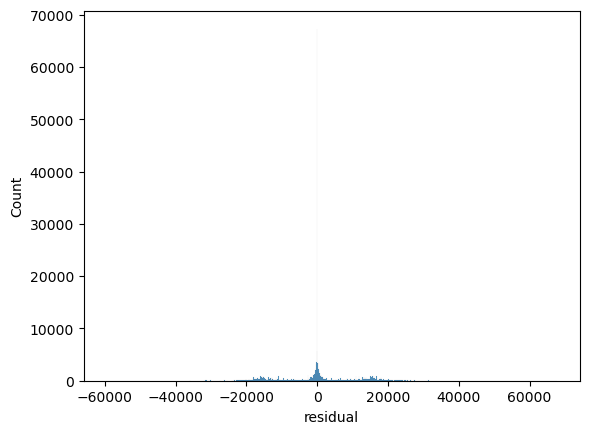

In [45]:
sns.histplot(train_results.residual);

In [46]:
train_results.residual.describe()

count    240122.000000
mean        -42.523020
std       10774.606220
min      -59605.000000
25%       -1543.583333
50%           0.000000
75%        1426.000000
max       67747.333333
Name: residual, dtype: float64

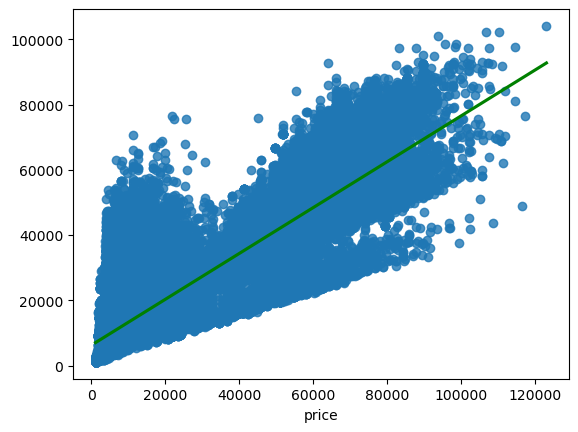

In [47]:
sns.regplot(x=y_train,y=train_pred,data=train_results, line_kws={'color': 'g'});

In [48]:
r2_score(y_train,train_pred).round(2)

0.77

In [49]:
test_pred=knn_reg.predict(X_test)
test_results=pd.DataFrame({'Price':y_test,
                            'predicted':test_pred,
                            'residual':y_test - test_pred})
test_results.head()

,Price,predicted,residual
27131,7366,24045.666667,-16679.666667
266857,64831,72966.000000,-8135.000000
141228,6195,21559.000000,-15364.000000
288329,60160,43922.666667,16237.333333
97334,6578,22613.333333,-16035.333333


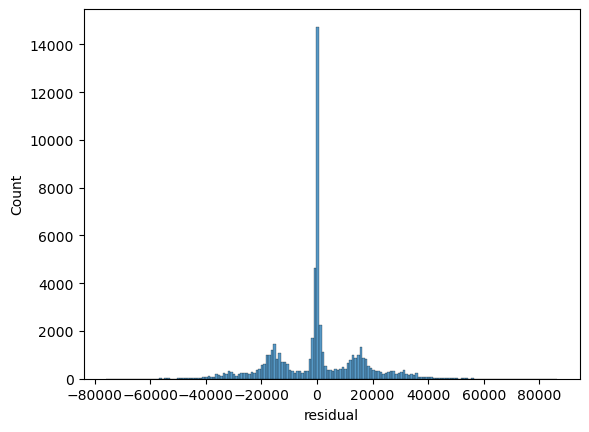

In [50]:
sns.histplot(test_results.residual);

In [51]:
test_results.residual.describe()

count    60031.000000
mean       -15.523452
std      15682.063496
min     -75808.000000
25%      -9477.333333
50%          0.000000
75%       8383.500000
max      86332.000000
Name: residual, dtype: float64

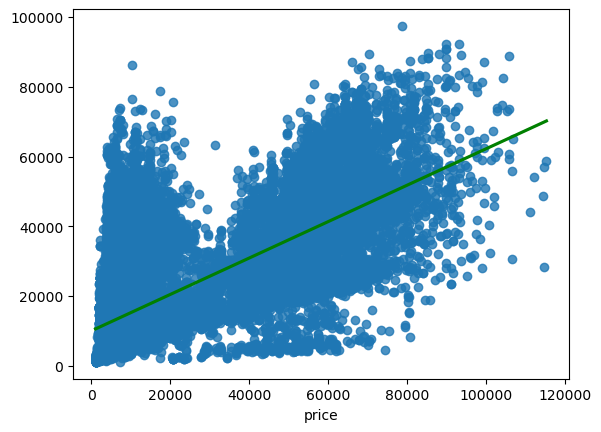

In [52]:
sns.regplot(x=y_test,y=test_pred,data=test_results, line_kws={'color': 'g'});

In [53]:
r2_score(y_test,test_pred).round(2)

0.52

In [54]:
ERROR_METRICS(y_test,test_pred)

{'ME': -15.523, 'MAE': 10747.308, 'MAPE': 99.32, 'RMSE': 15681.941}

# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [56]:
from sklearn.model_selection import GridSearchCV
# user grid search to find optimized tree
param_grid = {
    'n_estimators': [100],
    'max_depth': [2,5],
    'min_impurity_decrease': [0, 0.01],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [10, 15],
    'max_features':['sqrt']
}

In [57]:
rf_reg = RandomForestRegressor(n_estimators=100,max_features=4,max_depth=3,random_state=123)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, max_features=4, random_state=123)

In [58]:
rf_reg_train_pred=rf_reg.predict(X_train)
rf_reg_train_results=pd.DataFrame({'Price':y_train,
                            'predicted':rf_reg_train_pred,
                            'residual':y_train - rf_reg_train_pred})
rf_reg_train_results.head()

,Price,predicted,residual
148417,13524,11072.466594,2451.533406
36879,9940,8468.649328,1471.350672
274531,55983,46178.294730,9804.705270
166397,7927,14168.692284,-6241.692284
272722,55502,52224.878371,3277.121629


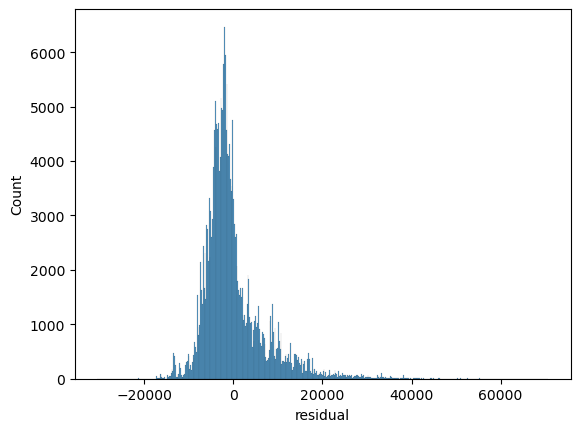

In [59]:
sns.histplot(rf_reg_train_results.residual);

In [60]:
rf_reg_train_results.residual.describe()

count    240122.000000
mean          0.274707
std        6989.180651
min      -30505.328276
25%       -4009.358116
50%       -1720.136913
75%        1889.071851
max       70679.027192
Name: residual, dtype: float64

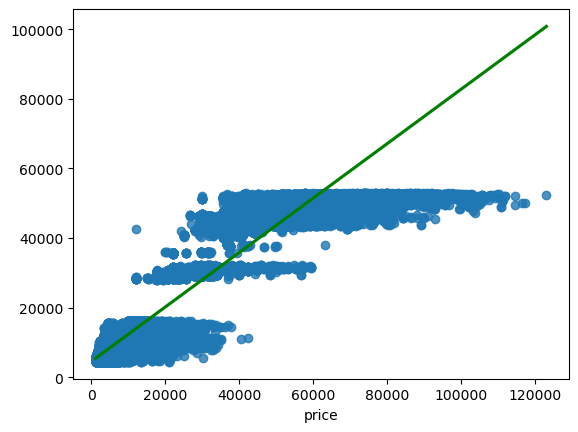

In [61]:
sns.regplot(x=y_train,y=rf_reg_train_pred,data=rf_reg_train_results, line_kws={'color': 'g'});

In [62]:
r2_score(y_train,rf_reg_train_pred).round(2)

0.91

In [63]:
rf_reg_test_pred=rf_reg.predict(X_test)
rf_reg_test_results=pd.DataFrame({'Price':y_test,
                            'predicted':rf_reg_test_pred,
                            'residual':y_test - rf_reg_test_pred})
rf_reg_test_results.head()

,Price,predicted,residual
27131,7366,8325.565994,-959.565994
266857,64831,52092.835867,12738.164133
141228,6195,11519.385426,-5324.385426
288329,60160,51312.989619,8847.010381
97334,6578,7913.888630,-1335.888630


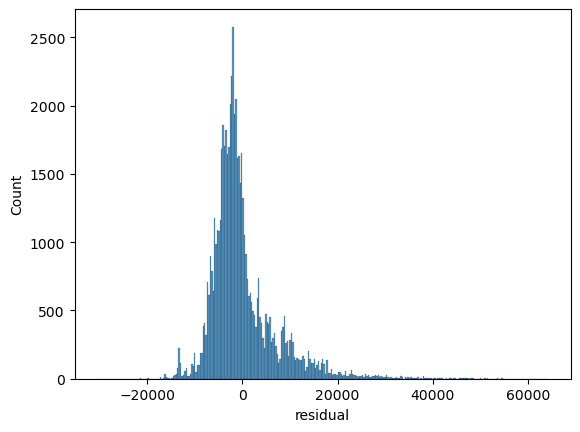

In [64]:
sns.histplot(rf_reg_test_results.residual);

In [65]:
rf_reg_test_results.residual.describe()

count    60031.000000
mean       -20.758109
std       6998.548953
min     -30505.328276
25%      -4006.021286
50%      -1708.672286
75%       1857.943817
max      64248.616465
Name: residual, dtype: float64

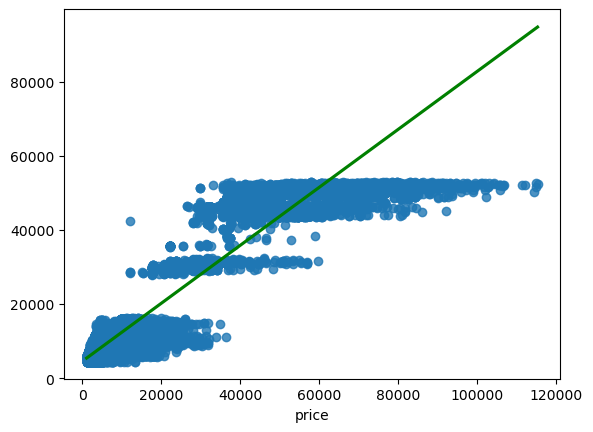

In [66]:
sns.regplot(x=y_test,y=rf_reg_test_pred,data=rf_reg_test_results, line_kws={'color': 'g'});

In [67]:
r2_score(y_test,rf_reg_test_pred).round(2)

0.9

In [68]:
ERROR_METRICS(y_train,rf_reg_train_pred)

{'ME': 0.275, 'MAE': 4858.232, 'MAPE': 50.488, 'RMSE': 6989.166}

In [69]:
ERROR_METRICS(y_test,rf_reg_test_pred)

{'ME': -20.758, 'MAE': 4835.777, 'MAPE': 50.307, 'RMSE': 6998.521}

# XGBoost

In [70]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

from sklearn.model_selection import train_test_split

In [71]:
gb_reg = GradientBoostingRegressor(n_estimators=100,max_features=4,max_depth=3,random_state=123)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(max_features=4, random_state=123)

In [72]:
gb_reg_train_pred=gb_reg.predict(X_train)
gb_reg_train_results=pd.DataFrame({'Price':y_train,
                            'predicted':gb_reg_train_pred,
                            'residual':y_train - gb_reg_train_pred})
gb_reg_train_results.head()

,Price,predicted,residual
148417,13524,11888.682171,1635.317829
36879,9940,9277.600789,662.399211
274531,55983,49625.404334,6357.595666
166397,7927,8125.918246,-198.918246
272722,55502,60898.098598,-5396.098598


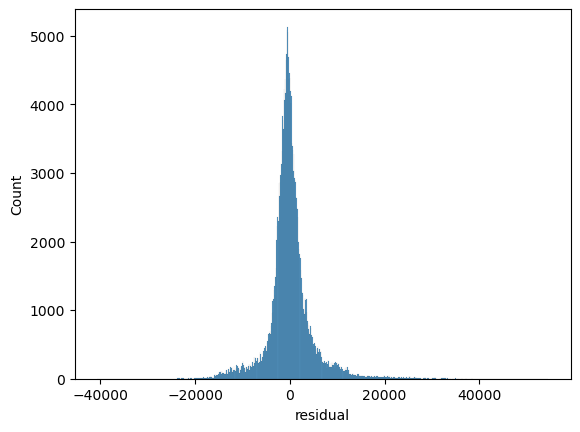

In [73]:
sns.histplot(gb_reg_train_results.residual);

In [74]:
gb_reg_train_results.residual.describe()

count    2.401220e+05
mean     1.530447e-12
std      4.894150e+03
min     -4.065073e+04
25%     -1.871871e+03
50%     -3.364704e+02
75%      1.488541e+03
max      5.453075e+04
Name: residual, dtype: float64

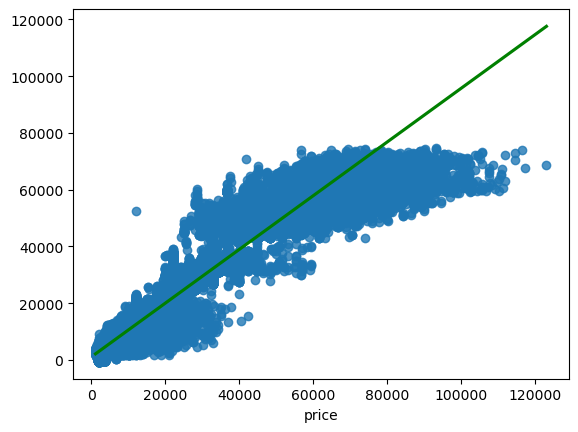

In [75]:
sns.regplot(x=y_train,y=gb_reg_train_pred,data=gb_reg_train_results, line_kws={'color': 'g'});

In [76]:
r2_score(y_train,gb_reg_train_pred).round(2)

0.95

In [77]:
ERROR_METRICS(y_train,gb_reg_train_pred)

{'ME': 0.0, 'MAE': 3011.039, 'MAPE': 23.059, 'RMSE': 4894.14}

In [78]:
gb_reg_test_pred=gb_reg.predict(X_test)
gb_reg_test_results=pd.DataFrame({'Price':y_test,
                            'predicted':gb_reg_test_pred,
                            'residual':y_test - gb_reg_test_pred})
gb_reg_test_results.head()

,Price,predicted,residual
27131,7366,6449.844908,916.155092
266857,64831,61256.947098,3574.052902
141228,6195,9151.342050,-2956.342050
288329,60160,56272.324193,3887.675807
97334,6578,6815.806281,-237.806281


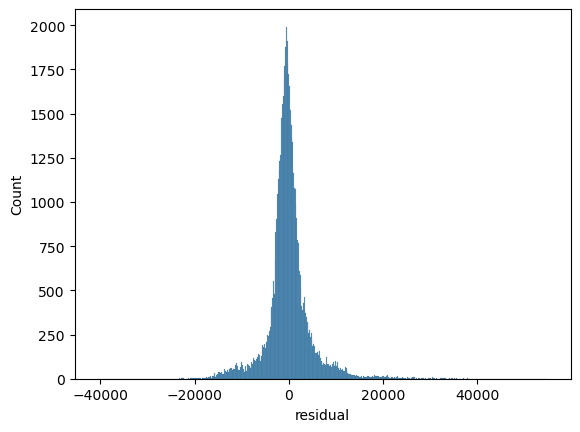

In [79]:
sns.histplot(gb_reg_test_results.residual);

In [80]:
gb_reg_test_results.residual.describe()

count    60031.000000
mean       -21.511580
std       4930.687960
min     -40650.730967
25%      -1903.763525
50%       -343.837815
75%       1465.231571
max      55082.122503
Name: residual, dtype: float64

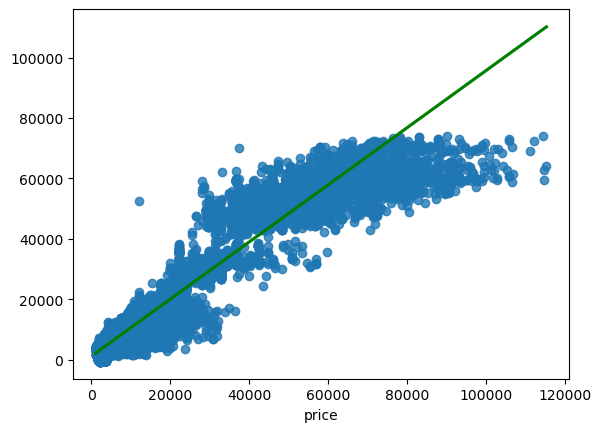

In [81]:
sns.regplot(x=y_test,y=gb_reg_test_pred,data=gb_reg_test_results, line_kws={'color': 'g'});

In [82]:
r2_score(y_test,gb_reg_test_pred).round(2)

0.95

In [83]:
ERROR_METRICS(y_test,gb_reg_test_pred)

{'ME': -21.512, 'MAE': 3019.499, 'MAPE': 23.095, 'RMSE': 4930.694}

# Neural Network

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Dense

In [85]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
  ])

In [86]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1100      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6201 (24.22 KB)
Trainable params: 6201 (24.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [96]:
model.compile(optimizer='adam', loss='huber_loss', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
7504/7504 [==============================] - 15s 2ms/step - loss: 3612.3257 - mae: 3612.8293 - val_loss: 3079.5471 - val_mae: 3080.0471
Epoch 2/100
7504/7504 [==============================] - 13s 2ms/step - loss: 3592.9268 - mae: 3593.4270 - val_loss: 3162.6484 - val_mae: 3163.1482
Epoch 3/100
7504/7504 [==============================] - 13s 2ms/step - loss: 3601.0801 - mae: 3601.5762 - val_loss: 3165.0095 - val_mae: 3165.5095
Epoch 4/100
7504/7504 [==============================] - 16s 2ms/step - loss: 3592.0903 - mae: 3592.5911 - val_loss: 3162.6233 - val_mae: 3163.1233
Epoch 5/100
7504/7504 [==============================] - 13s 2ms/step - loss: 3583.8784 - mae: 3584.3748 - val_loss: 3141.1675 - val_mae: 3141.6675
Epoch 6/100
7504/7504 [==============================] - 14s 2ms/step - loss: 3592.8672 - mae: 3593.3708 - val_loss: 3732.2603 - val_mae: 3732.7603
Epoch 7/100
7504/7504 [==============================] - 13s 2ms/step - loss: 3586.3855 - mae: 3586.8892 - val_l

7504/7504 [==============================] - 16s 2ms/step - loss: 3474.8271 - mae: 3475.3193 - val_loss: 3020.0732 - val_mae: 3020.5732
Epoch 57/100
7504/7504 [==============================] - 16s 2ms/step - loss: 3472.8914 - mae: 3473.3813 - val_loss: 3061.1243 - val_mae: 3061.6238
Epoch 58/100
7504/7504 [==============================] - 14s 2ms/step - loss: 3483.9014 - mae: 3484.3938 - val_loss: 2917.7517 - val_mae: 2918.2517
Epoch 59/100
7504/7504 [==============================] - 14s 2ms/step - loss: 3488.9595 - mae: 3489.4614 - val_loss: 3061.9072 - val_mae: 3062.4067
Epoch 60/100
7504/7504 [==============================] - 14s 2ms/step - loss: 3482.2856 - mae: 3482.7966 - val_loss: 2898.4329 - val_mae: 2898.9333
Epoch 61/100
7504/7504 [==============================] - 13s 2ms/step - loss: 3471.3237 - mae: 3471.8218 - val_loss: 2952.1707 - val_mae: 2952.6707
Epoch 62/100
7504/7504 [==============================] - 14s 2ms/step - loss: 3477.0505 - mae: 3477.5454 - val_loss: 2

In [97]:
model.evaluate(X_test, y_test)

1876/1876 [==============================] - 2s 1ms/step - loss: 2920.8018 - mae: 2921.3018


[2920.8017578125, 2921.3017578125]

In [102]:
pd.DataFrame(history.history).head()

,loss,mae,val_loss,val_mae
0,3612.325684,3612.829346,3079.547119,3080.047119
1,3592.926758,3593.427002,3162.648438,3163.148193
2,3601.080078,3601.576172,3165.009521,3165.509521
3,3592.090332,3592.591064,3162.623291,3163.123291
4,3583.878418,3584.374756,3141.167480,3141.667480


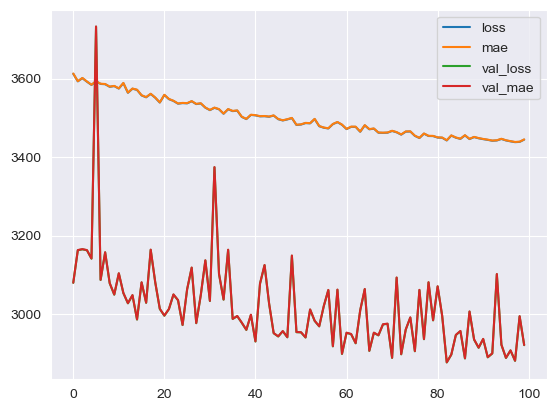

In [103]:
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
res_hist_df = pd.DataFrame(history.history)
res_hist_df.plot()
plt.grid(True)
plt.show()

In [106]:
new_data, y_actual = X_test[:10], y_test[:10]

y_proba = model.predict(new_data)

print(f"Actual data : {y_actual}")

for pred in y_proba:
    print(np.argmax(pred))

1/1 [==============================] - 0s 18ms/step
Actual data : 27131      7366
266857    64831
141228     6195
288329    60160
97334      6578
135931     4555
290630    23838
141944     3860
244517    32230
215903    76841
Name: price, dtype: int64
0
0
0
0
0
0
0
0
0
0
